## NLP project - Milestone 1 - Interactive Debugging Tool

### Part 1 - Importing Libraries and Modules

This section of the code is responsible for importing the necessary libraries and modules required for the program. It's divided into different categories:

- **Panel Modules:** This section imports modules related to the graphical user interface (GUI). It includes the IPython display module for rendering outputs and ipywidgets for creating interactive widgets.

- **Visualization Modules:** These modules are used for data visualization. They include Matplotlib for creating plots and charts and PIL (Python Imaging Library) for image processing.

- **Data Manipulation Modules:** This part imports modules for data manipulation and processing. It includes NumPy for numerical operations.

- **Import the `Crawler` Class:** This line imports the `Crawler` class from a custom module named `crawler`. This class is used to fetch data related to a game.

In [1]:
# Import necessary libraries and modules
# Panel modules
from IPython.display import display, clear_output
import ipywidgets as widgets
# Visualization modules
import matplotlib.pyplot as plt
from pprint import pprint
from PIL import Image
# Data manipulation modules
import numpy as np

# Import the 'Crawler' class from the 'crawler' module
from crawler import Crawler

### Part 2 - Creating an Instance of the `Crawler` Class
In this section, an instance of the `Crawler` class is created by initializing the `crawler` variable. This instance will be used to fetch game-related data.

In [2]:
# Create an instance of the 'Crawler' class
crawler = Crawler()

### Part 3 - Defining the 'Panel' Class

The `Panel` class is defined in this section, and it serves as the main structure for managing the graphical user interface (GUI) of the program. This part can be further divided into several sub-sections:

- **Initialization and Instance Variables:** The `__init__` method is used to initialize instance variables, including default values for the season and game type, the path to the rink image, and flags for tracking the displayed data.

- **Creating GUI Widgets:** This part creates various widgets, such as `Dropdowns`, `Text`, `Buttons`, `ToggleButtons`, and `Sliders`, for user interaction.

- **Functionality for GUI Widgets:** There are methods that define the functionality for different GUI elements. For example, the `game_id_functionality` method updates the game ID based on season and game type, the `go_functionality` method fetches and displays data, the `show_functionality` method displays selected data, and the `reset_functionality` method resets the panel to default values.

- **Displaying the Initial Panel:** The `display_init_panel` method assembles the GUI components into a box and displays them to the user.

- **Plotting a Game:** The `plot_game` method is responsible for visualizing game-related data by creating an image and overlaying information on it.

In [3]:
# Define a class called 'Panel' to manage the graphical user interface
class Panel():
    def __init__(self) -> None:
        # Initialize instance variables
        self.default_values = {'season': 2016, 'type': 'regular_season'}
        self.rink_img_path = 'nhl_rink.png'
        self.current_data = None
        self.is_displayed = False

        # Create dropdown widgets for selecting season and game type
        self.season_dropdown = widgets.Dropdown(options=list(range(crawler.dataset_start_season,
                                                                   crawler.dataset_end_season+1)),
                                                description='Season:')
        self.type_dropdown = widgets.Dropdown(options=['regular_season', 'playoffs'],
                                              description='Type:')

        # Initialize the default game ID based on the selected season and game type
        game_id_value = f"{self.season_dropdown.value}{crawler.game_types[self.type_dropdown.value]}0001"
        self.game_id_text = widgets.Text(value=game_id_value, description='Game ID:')

        # Create buttons and controlers for various actions:
        #       Go:         To select the desired information
        #       Show:       Print selected information in a pretty format
        #       Reset:      Reset the panel and its variables to the default value
        #       Toggle:     At each point, shows the selected information keys
        #       Slider:     In case the desired information is a list, it controls
        #                   the index
        self.go_button = widgets.Button(description='Go')
        self.show_button = widgets.Button(description='Show')
        self.reset_button = widgets.Button(description='Reset')
        self.toggle_button = None
        self.slider = None

        # Set up functionality for various GUI elements
        self.game_id_functionality()
        self.season_functionality()
        self.type_functionality()
        self.go_functionality()
        self.show_functionality()
        self.reset_functionality()

        # Display the initial control panel
        self.display_init_panel()

    # Define functionality for changing the game ID based on season and type selection
    def game_id_functionality(self) -> None:
        def change_game_id_text(_) -> None:
            game_id_text = f"{self.season_dropdown.value}{crawler.game_types[self.type_dropdown.value]}"
            if self.type_dropdown.value == 'regular_season':
                self.game_id_text.value = f"{game_id_text}0001"
            else:
                self.game_id_text.value = f"{game_id_text}0111"

        # Make game_id sensitive to season and type
        self.season_dropdown.observe(change_game_id_text)
        self.type_dropdown.observe(change_game_id_text)

    # Define functionality for changing the season value based on the entered game ID
    def season_functionality(self) -> None:
        def change_season_value(_) -> None:
            try:
                self.season_dropdown.value = int(self.game_id_text.value[:4])
            except:
                return

        # Make season dropdown sensitive to game_id
        self.game_id_text.observe(change_season_value)

    # Define functionality for changing the game type based on the entered game ID
    def type_functionality(self) -> None:
        def change_type_value(_) -> None:
            try:
                self.type_dropdown.value = crawler.inv_game_types[self.game_id_text.value[4:6]]
            except:
                return

        # Make type dropdown sensitive to game_id
        self.game_id_text.observe(change_type_value)

    # Define functionality for the 'Go' button to fetch and display data
    def go_functionality(self) -> None:
        def go_button_clicked(_) -> None:
            # Get the game_id from game_id text widget
            game_id = self.game_id_text.value
            try:
                self.current_data = crawler.read_data_by_game_id(game_id)
            except:
                # In case the game_id is not valid
                return

            # Create a ToggleButtons widget to select data categories and display it.
            self.toggle_button = widgets.ToggleButtons(options=self.current_data.keys(),
                                                       value=None)
            display(self.toggle_button)

            # Define functionality for the toggle button to narrow the information
            def toggle_button_clicked(_) -> None:
                # If the information has already been shown, do nothing
                if self.is_displayed:
                    return
                # If none of the buttons have not been selected, do nothing
                if self.toggle_button.value == None:
                    return

                # Narrow the data by the selected key
                self.current_data = self.current_data[self.toggle_button.value]

                # In case that the current_data has no key
                if not isinstance(self.current_data, dict):
                    # In case the current data is list, the slider is being displayed
                    if isinstance(self.current_data, list):
                        self.slider = widgets.IntSlider(min=0, max=len(self.current_data),
                                                        description='Index:')
                        display(self.slider)
                    # The current data is neither dictionary nor list, so just print the variable
                    else:
                        pprint(self.current_data)
                    # Set the is_displayed to True
                    self.is_displayed = True
                    return

                # Create the next toggle button widget and add its functionality
                self.toggle_button = widgets.ToggleButtons(options=self.current_data.keys(),
                                                            value=None)
                self.toggle_button.observe(toggle_button_clicked)
                # Display the next toggle button
                display(self.toggle_button)
            # Add the functionality of the toggle button
            self.toggle_button.observe(toggle_button_clicked)

        # Link the functionality of the 'Go' button to the 'Go' button
        self.go_button.on_click(go_button_clicked)

    # Define functionality for the 'Show' button to display selected data
    def show_functionality(self) -> None:
        def show_button_clicked(_) -> None:
            # If none of the keys are selected, all the information should be presented
            if self.current_data == None:
                game_id = self.game_id_text.value
                try:
                    self.current_data = crawler.read_data_by_game_id(game_id)
                except:
                    return
            # If the current data is list, it narrows the list with index
            if isinstance(self.current_data, list):
                self.current_data = self.current_data[self.slider.value]
                self.plot_game()
            # Print the selected information in a pretty way
            pprint(self.current_data)
        # Add the functionality of the 'Show' button
        self.show_button.on_click(show_button_clicked)

    # Define functionality for the 'Reset' button to reset the control panel
    def reset_functionality(self) -> None:
        def reset_button_clicked(_) -> None:
            # Clear output
            clear_output()
            # Reset the dropdown values to default values
            self.season_dropdown.value = self.default_values['season']
            self.type_dropdown.value = self.default_values['type']
            # Reset the game id base on season and type default values
            self.game_id_functionality()
            # Display the panel again
            self.display_init_panel()
        # Add the functionality of the 'Reset' button
        self.reset_button.on_click(reset_button_clicked)

    # Display the initial panel
    def display_init_panel(self) -> None:
        self.control_box = widgets.Box(children=[self.season_dropdown,
                                                 self.type_dropdown,
                                                 self.game_id_text,
                                                 self.go_button,
                                                 self.show_button,
                                                 self.reset_button])

        display(self.control_box)

    # Plot a game based on selected data
    def plot_game(self) -> None:
        # Get the selected game id
        game_id = self.game_id_text.value
        # Get the information of game base on selected game id
        game_info = crawler.read_data_by_game_id(game_id)
        # Get the index of event
        event_idx = self.slider.value
        # Get some information from the event
        period = game_info['liveData']['plays']['allPlays'][event_idx]["about"]["period"]
        home_team = game_info["gameData"]["teams"]["home"]["abbreviation"]
        away_team = game_info["gameData"]["teams"]["away"]["abbreviation"]
        event_desc = game_info['liveData']['plays']['allPlays'][event_idx]["result"]["description"]
        period_time = game_info['liveData']['plays']['allPlays'][event_idx]["about"]["periodTime"]

        # Determine the left team and the right team on selected event.
        if game_info["liveData"]["linescore"]["periods"][period]['home']['rinkSide'] == 'left':
            left_team = home_team
            right_team = away_team
        else:
            left_team = away_team
            right_team = home_team

        # Create an image base on the above information
        img = Image.open(self.rink_img_path)
        fig, ax = plt.subplots(figsize=(15,5))
        ax.imshow(img, extent=[-100, 100, -42.5, 42.5])
        ax.set_xticks(np.linspace(-100.0, 100.0, 9))
        ax.set_yticks(np.linspace(-42.5, 42.5, 5))
        ax.set_title(event_desc + '\n' + period_time + '  P-' + str(period) + '\n'+ left_team + ' '*40 + right_team)
        ax.set_xlabel('feet')
        ax.set_ylabel('feet')

        # Specify the location of event on the rink image
        X = game_info['liveData']['plays']['allPlays'][event_idx]['coordinates']['x']
        Y = game_info['liveData']['plays']['allPlays'][event_idx]['coordinates']['y']
        ax.plot([X],[Y],'bo')
        ax.annotate(f"  ({str(X)}, {str(Y)})", xy=(X, Y))

        # Display the final image
        plt.show()


### Part 4 - Creating an Instance of the `Panel` Class
In the final section of the code, an instance of the `Panel` class is created, and this instance is assigned to the variable `panel`. This part effectively initiates the user interface and allows users to interact with the program.

Box(children=(Dropdown(description='Season:', options=(2016, 2017, 2018, 2019, 2020), value=2016), Dropdown(de…

ToggleButtons(options=('copyright', 'gamePk', 'link', 'metaData', 'gameData', 'liveData'), value=None)

ToggleButtons(options=('plays', 'linescore', 'boxscore', 'decisions'), value=None)

ToggleButtons(options=('allPlays', 'scoringPlays', 'penaltyPlays', 'playsByPeriod', 'currentPlay'), value=None…

IntSlider(value=0, description='Index:', max=318)

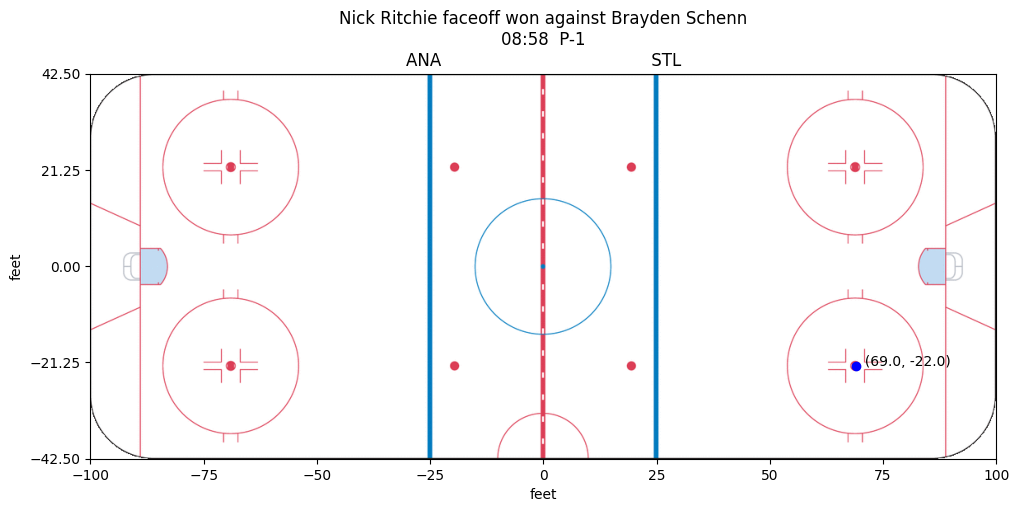

{'about': {'dateTime': '2017-11-30T02:28:46Z',
           'eventId': 80,
           'eventIdx': 46,
           'goals': {'away': 1, 'home': 0},
           'ordinalNum': '1st',
           'period': 1,
           'periodTime': '08:58',
           'periodTimeRemaining': '11:02',
           'periodType': 'REGULAR'},
 'coordinates': {'x': 69.0, 'y': -22.0},
 'players': [{'player': {'fullName': 'Nick Ritchie',
                         'id': 8477941,
                         'link': '/api/v1/people/8477941'},
              'playerType': 'Winner'},
             {'player': {'fullName': 'Brayden Schenn',
                         'id': 8475170,
                         'link': '/api/v1/people/8475170'},
              'playerType': 'Loser'}],
 'result': {'description': 'Nick Ritchie faceoff won against Brayden Schenn',
            'event': 'Faceoff',
            'eventCode': 'STL80',
            'eventTypeId': 'FACEOFF'},
 'team': {'id': 24,
          'link': '/api/v1/teams/24',
          'name': 

In [4]:
panel = Panel()